In [1]:
import os

from pathlib import Path

from matplotlib import pyplot as plt

import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az

from sphincter.branchpoints import FORMULAE
from sphincter.plotting import save_figure

az.rcParams["data.load"] = "eager"

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
here = Path(os.path.realpath('.'))

root_dir = here.parent
branchpoints_data_file = root_dir / "data" / "prepared" / "branchpoints.csv"
idata_dir = root_dir / "inferences" / "branchpoints"

branchpoints = pd.read_csv(branchpoints_data_file)
branchpoints.head()

,Unnamed: 0,date,age,pa_number,branch_number,depth,pa_diam,sphincter_diameter,bulb_diameter,firstorder_diameter,forking,sphincter_per_firstorder,firstorder_per_pa,comments,mouse_id,branch_id,is_sphincter,is_bulb,ln_depth,logit_firstorder_per_pa
0,1,140120,old,1,2.0,212.0,10.0,4.0,8.0,7.0,NaN,0.571429,0.70,NaN,140120,2,True,False,5.356586,0.847298
1,2,140120,old,1,3.0,274.0,10.0,4.0,9.0,6.0,NaN,0.666667,0.60,NaN,140120,3,True,True,5.613128,0.405465
2,3,140120,old,1,4.0,296.0,10.0,5.0,7.0,6.0,NaN,0.833333,0.60,NaN,140120,4,False,False,5.690359,0.405465
3,4,140120,old,1,5.0,314.0,8.0,5.0,4.0,4.0,NaN,1.250000,0.50,NaN,140120,5,False,False,5.749393,0.000000
4,5,140120,old,1,6.0,351.0,8.0,6.0,6.0,6.0,NaN,1.000000,0.75,NaN,140120,6,False,False,5.860786,1.098612


In [3]:
models = {
    k: bmb.Model(formula=v, data=branchpoints, family="bernoulli") 
    for k, v in FORMULAE.items() 
}
models["is_sphincter"]

       Formula: is_sphincter['True'] ~ age + branch_number + ln_depth + logit_firstorder_per_pa
        Family: bernoulli
          Link: p = logit
  Observations: 1230
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 18.701)
            age ~ Normal(mu: 0.0, sigma: 5.3231)
            branch_number ~ Normal(mu: 0.0, sigma: 1.1163)
            ln_depth ~ Normal(mu: 0.0, sigma: 3.1815)
            logit_firstorder_per_pa ~ Normal(mu: 0.0, sigma: 4.0128)

In [4]:
idata_sphincter = az.from_netcdf(idata_dir / "is_sphincter.nc")
idata_bulb = az.from_netcdf(idata_dir / "is_bulb.nc")
print("Sphincter results:")
display(az.summary(idata_sphincter, var_names=["~p"]))
print("Bulb results:")
display(az.summary(idata_bulb, var_names=["~p"]))

Sphincter results:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.031,0.486,0.109,1.943,0.008,0.006,3483.0,3133.0,1.0
age[old],-0.020,0.138,-0.271,0.240,0.002,0.002,4515.0,3422.0,1.0
branch_number,-0.228,0.040,-0.304,-0.155,0.001,0.001,3233.0,3389.0,1.0
ln_depth,-0.188,0.093,-0.367,-0.019,0.002,0.001,3123.0,2922.0,1.0
logit_firstorder_per_pa,0.146,0.105,-0.039,0.349,0.002,0.001,4278.0,2771.0,1.0


Bulb results:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.333,0.527,-0.700,1.282,0.008,0.006,3876.0,3327.0,1.0
age[old],0.639,0.144,0.363,0.909,0.002,0.002,4197.0,2509.0,1.0
branch_number,-0.249,0.043,-0.326,-0.168,0.001,0.001,3340.0,3188.0,1.0
ln_depth,-0.095,0.100,-0.283,0.092,0.002,0.001,3566.0,3192.0,1.0
logit_firstorder_per_pa,-1.439,0.138,-1.696,-1.183,0.002,0.002,4145.0,3239.0,1.0


In [5]:
branchpoints

,Unnamed: 0,date,age,pa_number,branch_number,depth,pa_diam,sphincter_diameter,bulb_diameter,firstorder_diameter,forking,sphincter_per_firstorder,firstorder_per_pa,comments,mouse_id,branch_id,is_sphincter,is_bulb,ln_depth,logit_firstorder_per_pa
0,1,140120,old,1,2.0,212.0,10.0,4.0,8.0,7.0,NaN,0.571429,0.700000,NaN,140120,2,True,False,5.356586,0.847298
1,2,140120,old,1,3.0,274.0,10.0,4.0,9.0,6.0,NaN,0.666667,0.600000,NaN,140120,3,True,True,5.613128,0.405465
2,3,140120,old,1,4.0,296.0,10.0,5.0,7.0,6.0,NaN,0.833333,0.600000,NaN,140120,4,False,False,5.690359,0.405465
3,4,140120,old,1,5.0,314.0,8.0,5.0,4.0,4.0,NaN,1.250000,0.500000,NaN,140120,5,False,False,5.749393,0.000000
4,5,140120,old,1,6.0,351.0,8.0,6.0,6.0,6.0,NaN,1.000000,0.750000,NaN,140120,6,False,False,5.860786,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1441,270918,adult,12,2.0,220.0,8.6,4.4,4.1,3.7,NaN,1.189189,0.430233,NaN,270918,2,False,False,5.393628,-0.280902
1226,1442,270918,adult,12,3.0,240.0,7.7,5.3,4.2,4.1,NaN,1.292683,0.532468,NaN,270918,3,False,False,5.480639,0.130053
1227,1444,270918,adult,12,5.0,344.0,6.3,3.7,3.8,3.3,NaN,1.121212,0.523810,NaN,270918,5,False,False,5.840642,0.095310
1228,1445,270918,adult,12,6.0,380.0,5.4,5.2,4.0,4.0,NaN,1.300000,0.740741,NaN,270918,6,False,False,5.940171,1.049822


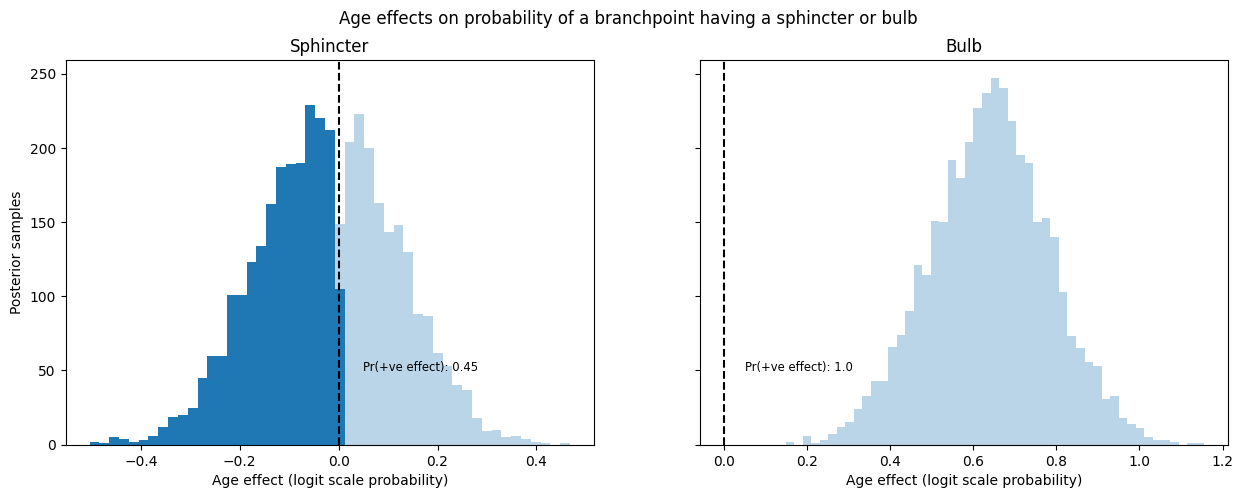

In [6]:
def plot_age_effect_samples(idata, ax):

    age_effect_samples = idata.posterior["age"].to_numpy().flatten()
    tstat = (age_effect_samples > 0).mean()
    bins = np.linspace(age_effect_samples.min(), age_effect_samples.max(), 50)
    
    ax.hist(age_effect_samples[age_effect_samples < 0], bins=bins);
    ax.hist(age_effect_samples[age_effect_samples > 0], bins=bins, alpha=0.3, color="tab:blue");
    
    
    ax.axvline(0.0, linestyle="--", color="black");
    ax.text(0.05, 50, f"Pr(+ve effect): {tstat.round(2)}", fontsize="small");
    return ax

f, axes = plt.subplots(1, 2, figsize=[15, 5], sharey=True)
for idata, ax in zip([idata_sphincter, idata_bulb], axes):
    plot_age_effect_samples(idata, ax)
    ax.set(
        xlabel="Age effect (logit scale probability)",
        title=list(idata.observed_data.variables.keys())[-1][3:].capitalize()
    );
axes[0].set(ylabel="Posterior samples")
f.suptitle("Age effects on probability of a branchpoint having a sphincter or bulb");
save_figure(f, "branchpoint-effects")


Computed from 4000 posterior samples and 1230 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -731.52    14.99
p_loo        5.19        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1230  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

/Users/tedgro/repos/teddygroves/sphincter/.venv/lib/python3.13/site-packages/arviz/plots/khatplot.py:184: FutureWarning: support for DataArrays will be deprecated, please use ELPDData.The reason for this, is that we need to know the numbers of drawssampled from the posterior
  warnings.warn(


Computed from 4000 posterior samples and 1230 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -684.23    18.29
p_loo        5.64        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1230  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

/Users/tedgro/repos/teddygroves/sphincter/.venv/lib/python3.13/site-packages/arviz/plots/khatplot.py:184: FutureWarning: support for DataArrays will be deprecated, please use ELPDData.The reason for this, is that we need to know the numbers of drawssampled from the posterior
  warnings.warn(


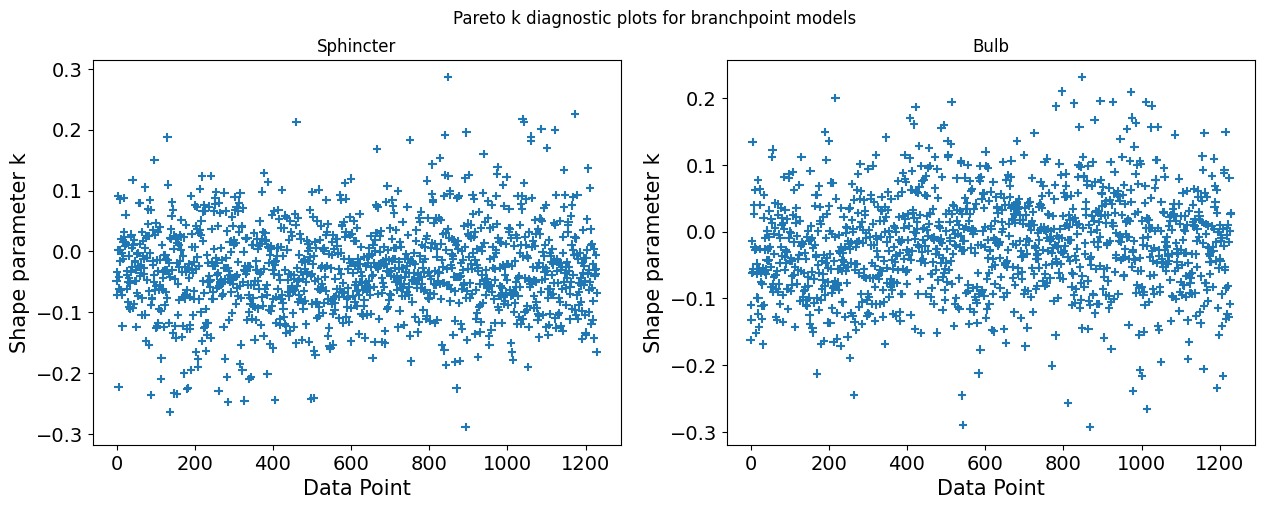

In [16]:
f, axes = plt.subplots(1, 2, figsize=[15, 5])

for idata, ax, name in zip([idata_sphincter, idata_bulb], axes, ["sphincter", "bulb"]):

    loo = az.loo(idata, pointwise=True)
    display(loo)
    az.plot_khat(loo.pareto_k, ax=ax);
    ax.set_title(name.capitalize())

f.suptitle("Pareto k diagnostic plots for branchpoint models")
save_figure(f, "branchpoint-pareto-k")

In [29]:
(loo.loo_i).mean()

<xarray.DataArray 'loo_i' ()> Size: 8B
array(-0.55628645)

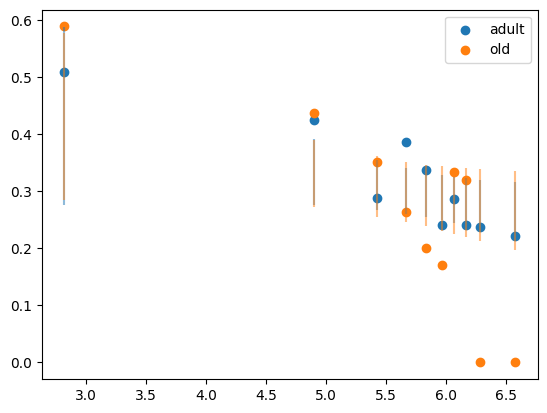

In [8]:
xcols = ["ln_depth", "branch_number", "logit_firstorder_per_pa"]
xcol_to_plot = "ln_depth"
model = models["is_sphincter"]
cuts = pd.qcut(branchpoints[xcol_to_plot], 10)
branchpoints["cut"] = cuts.map(lambda x: x.mid)
y = "is_sphincter"
plot_g = branchpoints.groupby(["cut", "age"], observed=True)
plotdf = (
    pd.DataFrame({y: plot_g[y].mean(), xcol_to_plot: plot_g["cut"].first()})
    .reset_index()
)
for col in xcols:
    if col != xcol_to_plot:
        plotdf[col] = branchpoints[col].mean()

pred = model.predict(idata_sphincter, data=plotdf, inplace=False)
plotdf["q5pct"], plotdf["q95pct"] = (
    pred.posterior["p"].quantile(q, dim=["chain", "draw"]).to_numpy()
    for q in (0.01, 0.99)
)

f,ax = plt.subplots()

for age, subdf in plotdf.groupby("age", observed=True):
    sct = ax.scatter(subdf[xcol_to_plot], subdf[y], label=age);
    ax.vlines(
        subdf[xcol_to_plot], 
        subdf["q5pct"], 
        subdf["q95pct"], 
        color=sct.get_edgecolors()[0],
        alpha=0.5,
    );
ax.legend();

In [9]:

plotdf

,cut,age,is_sphincter,ln_depth,branch_number,logit_firstorder_per_pa,q5pct,q95pct
0,2.8200,adult,0.509091,2.8200,3.504878,-0.101308,0.275328,0.588115
1,2.8200,old,0.588235,2.8200,3.504878,-0.101308,0.284978,0.576184
2,4.9020,adult,0.423729,4.9020,3.504878,-0.101308,0.275361,0.391911
3,4.9020,old,0.437500,4.9020,3.504878,-0.101308,0.271454,0.389338
4,5.4220,adult,0.287879,5.4220,3.504878,-0.101308,0.266442,0.354857
5,5.4220,old,0.350877,5.4220,3.504878,-0.101308,0.255250,0.360788
6,5.6665,adult,0.385714,5.6665,3.504878,-0.101308,0.260068,0.340924
7,5.6665,old,0.264151,5.6665,3.504878,-0.101308,0.245088,0.350488
8,5.8295,adult,0.337838,5.8295,3.504878,-0.101308,0.255044,0.333576
9,5.8295,old,0.200000,5.8295,3.504878,-0.101308,0.238687,0.346575
